In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

# Input

In [3]:
TCR_CL = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_TCR/augmented/tcr.clean.augmented.csv'

In [4]:
BC_MP = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_MHC_IONTORRENT/mapping/KMA-1t1/output/mapping.frag.gz'
BC_CL = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_MHC_IONTORRENT/mapping/KMA-1t1/output/mapping.clean.AKB.augmented.gz'

In [5]:
SPECIFICITY = '/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp9_MHC_IONTORRENT/barcode_library/barcode_specificity_annotations.xlsx'

# Output

# Load

In [6]:
sp_df = pd.read_excel(SPECIFICITY, sheet_name='CDX')

In [7]:
tcr_cl = pd.read_csv(TCR_CL)

In [8]:
bc_mp = pd.read_csv(BC_MP, sep='\t', usecols=[5,6], names=['barcode','read_id'])
bc_mp['barcode'] = bc_mp.barcode.str.split(' ', expand=True)[0]
bc_mp['gem'] = bc_mp.read_id.str.split('BX:Z:', expand=True)[1]

In [9]:
bc_mp

,barcode,read_id,gem
0,A1072B303,O9A3T:00253:02876 BX:Z:TTTACTGCAAGCGCTC-1,TTTACTGCAAGCGCTC-1
1,A1072B303,O9A3T:00356:00520 BX:Z:TTGACTTGTCTCTTAT-1,TTGACTTGTCTCTTAT-1
2,A1072B303,O9A3T:00610:06658 BX:Z:TTCTCAAGTAAACCTC-1,TTCTCAAGTAAACCTC-1
3,A1072B303,O9A3T:00573:05912 BX:Z:TGTCCCAAGATCTGAA-1,TGTCCCAAGATCTGAA-1
4,A1072B303,O9A3T:01715:05174 BX:Z:TGTCCCAAGATCTGAA-1,TGTCCCAAGATCTGAA-1
...,...,...,...
739466,A1079B318,O9A3T:00214:06437 BX:Z:CGCGGTACAAAGGTGC-1,CGCGGTACAAAGGTGC-1
739467,A1079B318,O9A3T:01269:03677 BX:Z:CCATGTCCATCCAACA-1,CCATGTCCATCCAACA-1
739468,A1079B318,O9A3T:01199:03529 BX:Z:CATGCCTTCCCAAGAT-1,CATGCCTTCCCAAGAT-1
739469,A1079B318,O9A3T:01702:00540 BX:Z:GTTACAGTCGGATGGA-1,GTTACAGTCGGATGGA-1


In [54]:
bc_cl = pd.read_csv(BC_CL)

# Set variables

In [44]:
a = set(tcr_cl.gem)

In [42]:
b = set(bc_cl.gem)

In [59]:
ab_bc = sp_df.Barcode

In [63]:
bc_cl['barcode_mhc'] = bc_cl.template_id_mhc.str.split('_', expand=True)[0]
bc_cl['barcode_cdx'] = bc_cl.template_id_cd8.str.split('_', expand=True)[0]

# Plotting GEMs per barcode

In [78]:
data_structure = [('Mapped GEMs', (bc_mp[bc_mp.barcode.isin(ab_bc)].groupby('barcode').gem.unique().apply(len),
                                        bc_mp[~bc_mp.barcode.isin(ab_bc)].groupby('barcode').gem.unique().apply(len))),
                  ('Credibly mapped GEMs', (bc_cl.groupby('barcode_cdx').gem.unique().apply(len),
                                                 bc_cl.groupby('barcode_mhc').gem.unique().apply(len))),
                  ('Credibly mapped GEMs intersecting with TCR annotated GEMs', (bc_cl[bc_cl.gem.isin(a.intersection(b))].groupby('barcode_cdx').gem.unique().apply(len),
                                                                                      bc_cl[bc_cl.gem.isin(a.intersection(b))].groupby('barcode_mhc').gem.unique().apply(len))),
                  ('Credibly mapped GEMs not intersecting with TCR annotated GEMs', (bc_cl[bc_cl.gem.isin(b-a)].groupby('barcode_cdx').gem.unique().apply(len),
                                                                                          bc_cl[bc_cl.gem.isin(b-a)].groupby('barcode_mhc').gem.unique().apply(len)))]

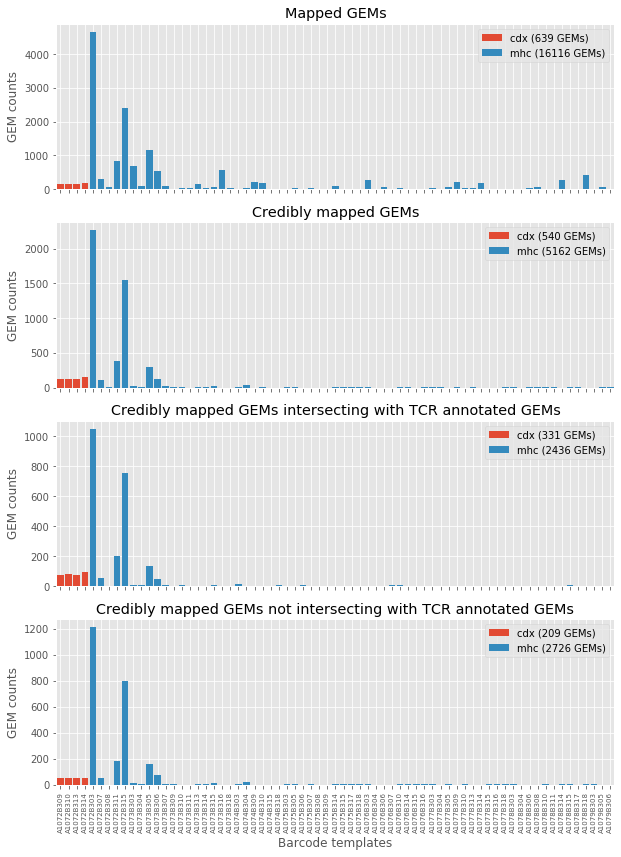

In [85]:
fig, axes = plt.subplots(4,1, figsize=(10,14), sharex=True)

for ax, (title, dataset) in zip(axes, data_structure):
    for label, data in zip(['cdx','mhc'], dataset):
        x = data.index
        y = data.values
        ax.bar(x, y, label=label + ' (%d GEMs)'%sum(y))
        
    ax.set_xlim(-0.5, len(x)-0.5)
    ax.set_ylabel("GEM counts")
    ax.set_title(title)
    ax.legend()
plt.xlabel("Barcode templates")
plt.xticks(rotation=90, fontsize=7)
plt.show()

# Plotting GEMs per clonotype

In [98]:
tcr_data = [('GEMs with annotated clonotypes (%d GEMs)', tcr_cl.groupby('ct').gem.unique().apply(len)),
            ('Gems with annotated CT intersecting with\nGEMs having credibly mapped BCs (%d GEMs)', tcr_cl[tcr_cl.gem.isin(a.intersection(b))].groupby('ct').gem.unique().apply(len)),
            ('Gems with annotated CT not intersecting with\nGEMs having credibly mapped BCs (%d GEMs)', tcr_cl[tcr_cl.gem.isin(a - b)].groupby('ct').gem.unique().apply(len))]

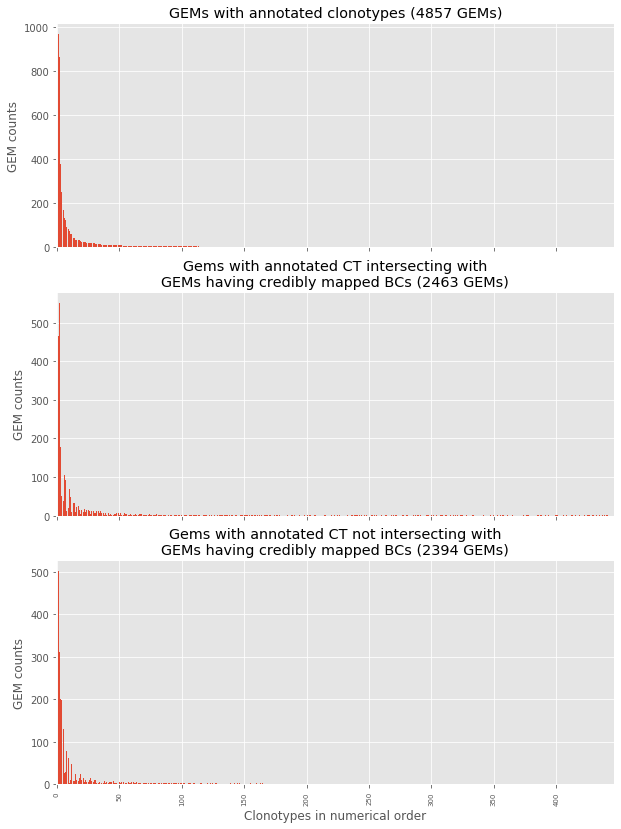

In [99]:
fig, axes = plt.subplots(3,1, figsize=(10,14), sharex=True)

for ax, (title, data) in zip(axes, tcr_data):
    x = data.index
    y = data.values
    ax.bar(x, y)
        
    ax.set_xlim(-0.5, len(x)-0.5)
    ax.set_ylabel("GEM counts")
    ax.set_title(title %sum(y))

plt.xlabel("Clonotypes in numerical order")
plt.xticks(rotation=90, fontsize=7)
plt.show()

Text(0.5, 1.0, 'GEM count per barcode template')

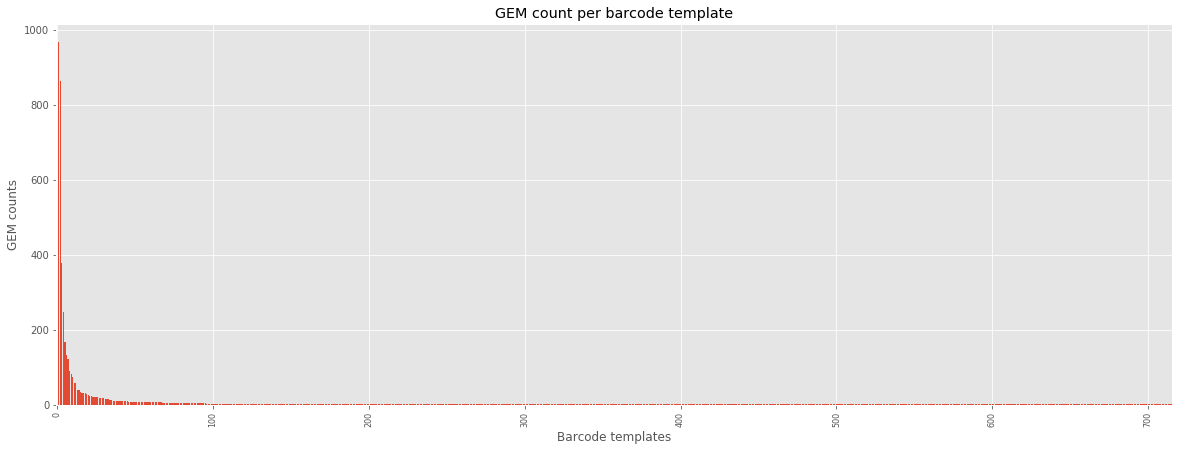

In [88]:
plt.figure(figsize=(20,7))
x = tcr_cl.groupby('ct').gem.unique().apply(len).index
y = tcr_cl.groupby('ct').gem.unique().apply(len).values
plt.bar(x,y)
plt.xlim(-0.5, len(x)-0.5)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Barcode templates")
plt.ylabel("GEM counts")
#plt.yscale('log')
#plt.grid(b=True, which='minor', color='white', linestyle='--')
plt.title("GEM count per barcode template")
#plt.savefig(snakemake.output[2], bbox_inches='tight')

# Individual plots

Text(0.5, 1.0, 'GEM count per barcode template')

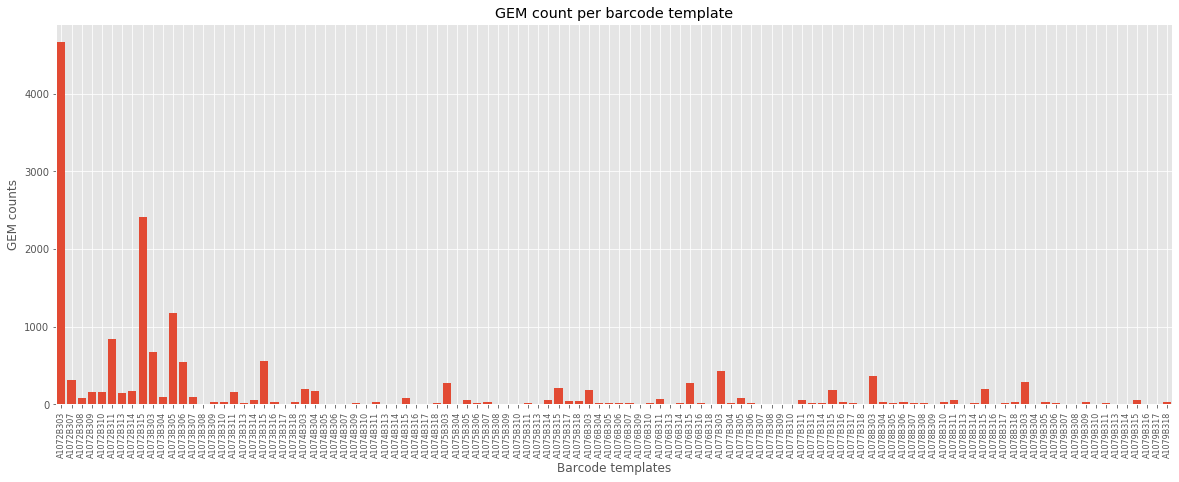

In [40]:
plt.figure(figsize=(20,7))
x = bc_mp.groupby('barcode').gem.unique().apply(len).index
y = bc_mp.groupby('barcode').gem.unique().apply(len).values
plt.bar(x,y)
plt.xlim(-0.5, len(x)-0.5)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Barcode templates")
plt.ylabel("GEM counts")
#plt.yscale('log')
#plt.grid(b=True, which='minor', color='white', linestyle='--')
plt.title("GEM count per barcode template")
#plt.savefig(snakemake.output[2], bbox_inches='tight')

Text(0.5, 1.0, 'GEM count per barcode template')

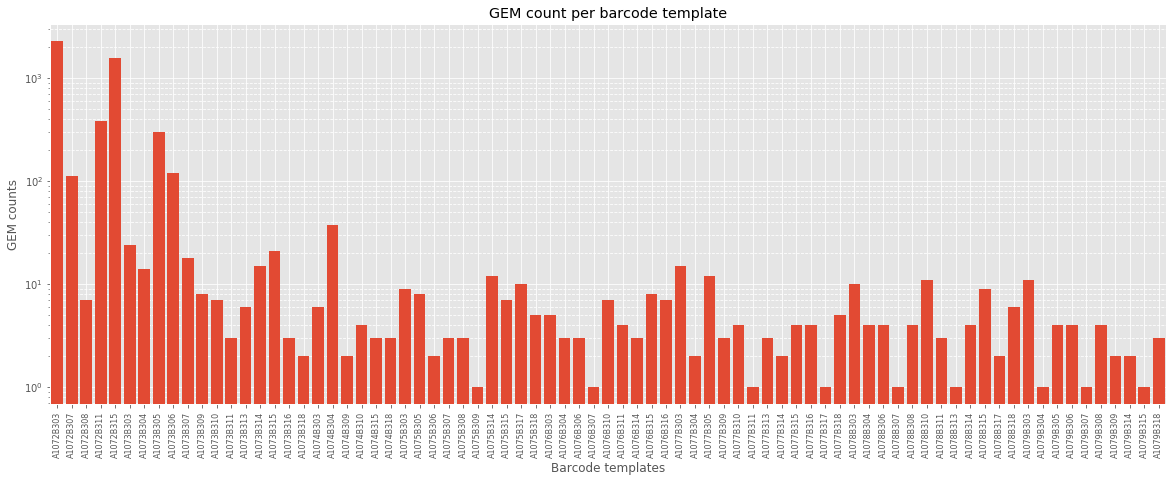

In [38]:
plt.figure(figsize=(20,7))
x = bc_cl.groupby('barcode').gem.unique().apply(len).index
y = bc_cl.groupby('barcode').gem.unique().apply(len).values
plt.bar(x,y)
plt.xlim(-0.5, len(x)-0.5)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Barcode templates")
plt.ylabel("GEM counts")
plt.yscale('log')
plt.grid(b=True, which='minor', color='white', linestyle='--')
plt.title("GEM count per barcode template")

Text(0.5, 1.0, 'GEM count per barcode template')

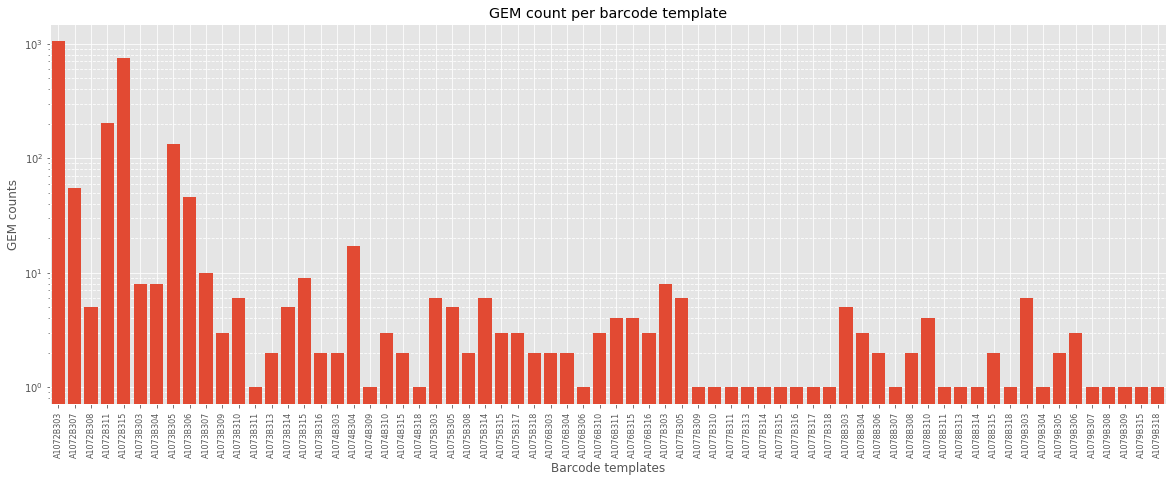

In [45]:
plt.figure(figsize=(20,7))
x = bc_cl[bc_cl.gem.isin(a.intersection(b))].groupby('barcode').gem.unique().apply(len).index
y = bc_cl[bc_cl.gem.isin(a.intersection(b))].groupby('barcode').gem.unique().apply(len).values
plt.bar(x,y)
plt.xlim(-0.5, len(x)-0.5)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Barcode templates")
plt.ylabel("GEM counts")
plt.yscale('log')
plt.grid(b=True, which='minor', color='white', linestyle='--')
plt.title("GEM count per barcode template")

Text(0.5, 1.0, 'GEM count per barcode template')

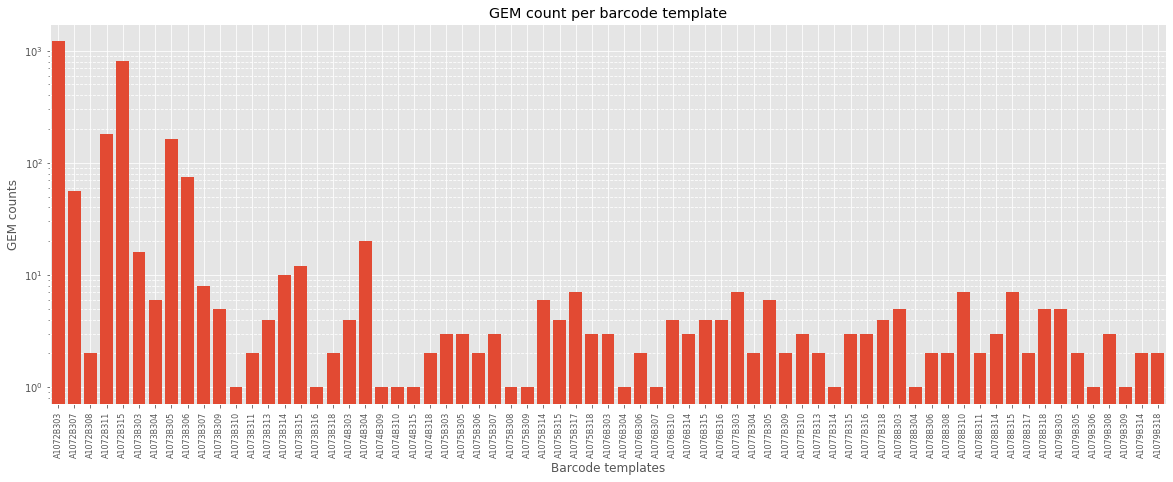

In [46]:
plt.figure(figsize=(20,7))
x = bc_cl[bc_cl.gem.isin(b-a)].groupby('barcode').gem.unique().apply(len).index
y = bc_cl[bc_cl.gem.isin(b-a)].groupby('barcode').gem.unique().apply(len).values
plt.bar(x,y)
plt.xlim(-0.5, len(x)-0.5)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Barcode templates")
plt.ylabel("GEM counts")
plt.yscale('log')
plt.grid(b=True, which='minor', color='white', linestyle='--')
plt.title("GEM count per barcode template")